Vladislav Hober, M3104, solution of the first task

In [8]:
import igraph
from igraph import *
import pynations
from pynations.CountryInfo import CountryInfo
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Building of the full graph of Europe. The package "pynations" contains information about neighbors of countries

In [9]:
file = open("countries.txt")
name = file.read().splitlines()
g_ = Graph()
g_.add_vertices(49)
g_.vs["name"] = name
for i in name:
    data = CountryInfo(i)
    nb = data.neighbors()
    v = g_.vs.find(name=i)
    for j in nb:
        check_europe = g_.vs.select(name=j)
        if(len(check_europe) == 1 and not((i == 'Albania' and j == 'Serbia') or (i == 'Serbia' and j == 'Albania'))):
            u = g_.vs.find(name=j)
            if(len(check_europe) == 1 and not(g_.are_connected(v, u))):
                g_.add_edge(v, u)

Drawing of the full graph g_ of Europe

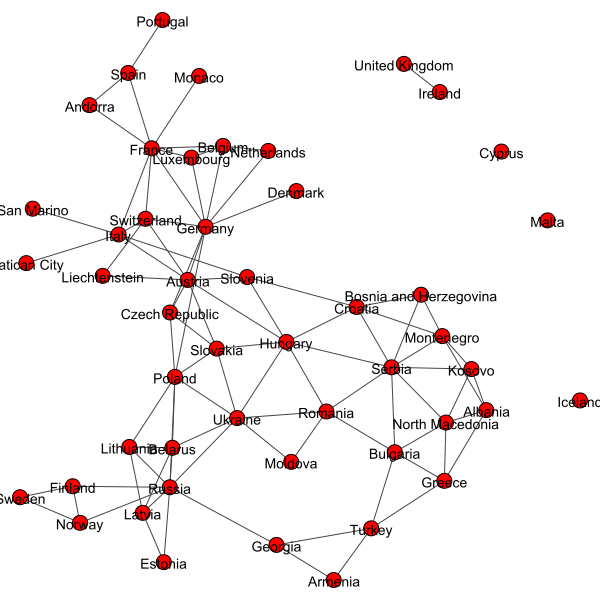

In [10]:
layout = g_.layout_fruchterman_reingold()
plot(g_, vertex_label=name, vertex_size = 15, layout = layout)

Building of the graph with networkx

In [11]:
g_nx = nx.Graph()
for i in name:
    g_nx.add_node(i)
for i in name:
    data = CountryInfo(i)
    nb = data.neighbors()
    for j in nb:
        if(j in name and not((i == 'Albania' and j == 'Serbia') or (i == 'Serbia' and j == 'Albania'))):
            g_nx.add_edge(i, j)

(a) Drawing the planar graph g_ of Europe with networkx

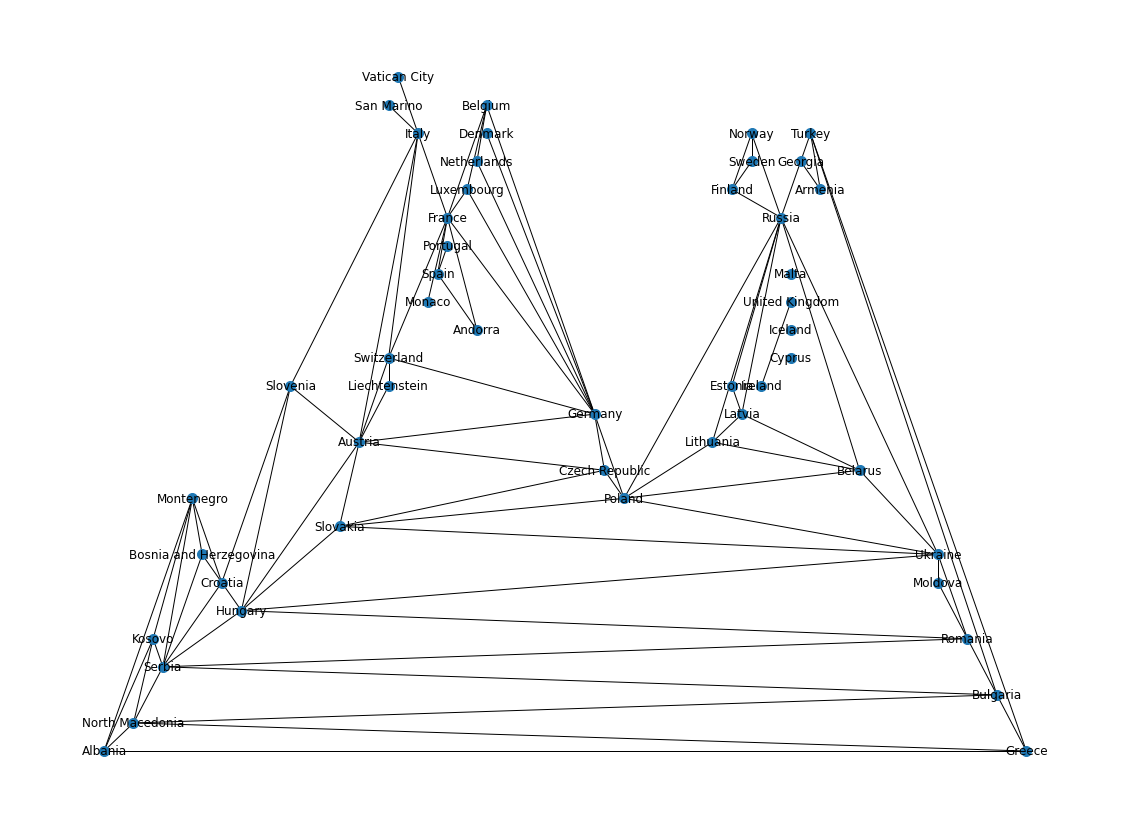

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_planar(g_nx, node_size=100, with_labels=True)

Getting largest connected component G with networkx and igraph

In [13]:
components = sorted(nx.connected_components(g_nx), key=len, reverse=True)
G_nx = g_nx.subgraph(components[0])
G_ig = igraph.Graph().from_networkx(G_nx)

(b) Using G_nx and G_ig and their methods from networkx and igraph

In [14]:
print('|V| - ', G_nx.number_of_nodes())
print('|E| - ', G_nx.number_of_edges())
mn = 1000
mx = -1
for country, degree in G_nx.degree:
    mn = min(mn, degree)
    mx = max(mx, degree)
print('𝛿(g) - ', mn)
print('Δ(g) - ', mx)
print('rad(G) - ', G_ig.radius()) 
print('diam(G) - ', G_ig.diameter()) 
print('girth(G) - ', G_ig.girth())
from networkx import center
print('center(G) - ', center(G_nx))
print('κ(G) - ', 1, 'Delete: ', nx.minimum_node_cut(G_nx))
print('λ(G) - ', 1, 'Delete: ', nx.minimum_edge_cut(G_nx))

|V| -  44
|E| -  91
𝛿(g) -  1
Δ(g) -  9
rad(G) -  5.0
diam(G) -  8
girth(G) -  3
center(G) -  ['Austria', 'Belarus', 'Croatia', 'Czech Republic', 'Germany', 'Hungary', 'Lithuania', 'Poland', 'Russia', 'Slovakia', 'Slovenia', 'Switzerland', 'Ukraine']
κ(G) -  1 Delete:  {'Germany'}
λ(G) -  1 Delete:  {('Spain', 'Portugal')}


(c) Using greedy_color from networkx to find vertex coloring, creating color_map to visualize the result

{'Germany': 0, 'Russia': 0, 'Austria': 1, 'France': 1, 'Serbia': 0, 'Hungary': 2, 'Poland': 1, 'Ukraine': 3, 'Italy': 0, 'Belarus': 2, 'Bulgaria': 1, 'Croatia': 1, 'Montenegro': 2, 'North Macedonia': 2, 'Romania': 4, 'Slovakia': 0, 'Switzerland': 2, 'Albania': 0, 'Belgium': 2, 'Czech Republic': 2, 'Greece': 3, 'Kosovo': 1, 'Latvia': 1, 'Lithuania': 3, 'Slovenia': 3, 'Turkey': 0, 'Bosnia and Herzegovina': 3, 'Finland': 1, 'Georgia': 1, 'Luxembourg': 3, 'Norway': 2, 'Spain': 0, 'Armenia': 2, 'Andorra': 2, 'Estonia': 2, 'Liechtenstein': 0, 'Moldova': 0, 'Netherlands': 1, 'Sweden': 0, 'Denmark': 1, 'Monaco': 0, 'Portugal': 1, 'San Marino': 1, 'Vatican City': 1}


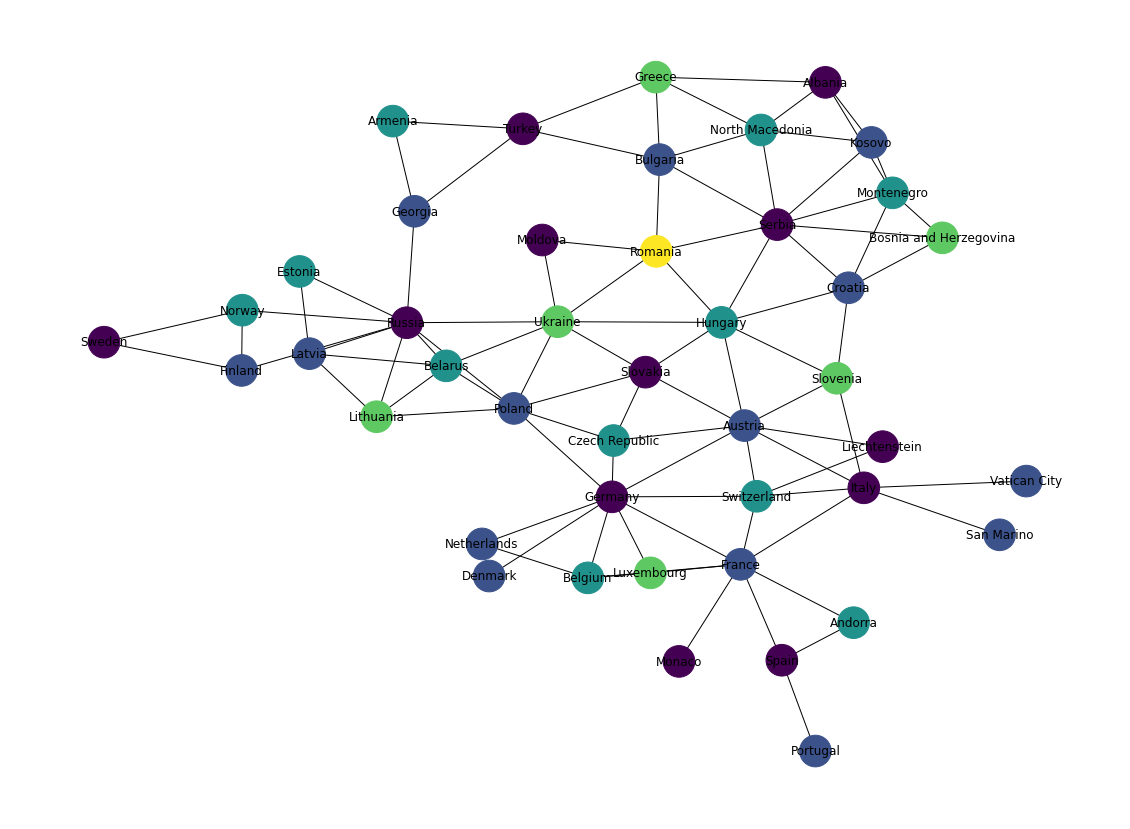

In [15]:
min_coloring = nx.greedy_color(G_nx)
print(min_coloring)
color_map = []
for node in G_nx:
    color_map.append(min_coloring[node])
fig, ax = plt.subplots(figsize=(20, 15))
pos_color = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_color, node_color=color_map, node_size=1000, with_labels=True)

(d) Creating a graph which has a node for each edge in G_nx and an edge joining those nodes if the two edges in G_nx share a common node to find minimum edge cover using greedy_color

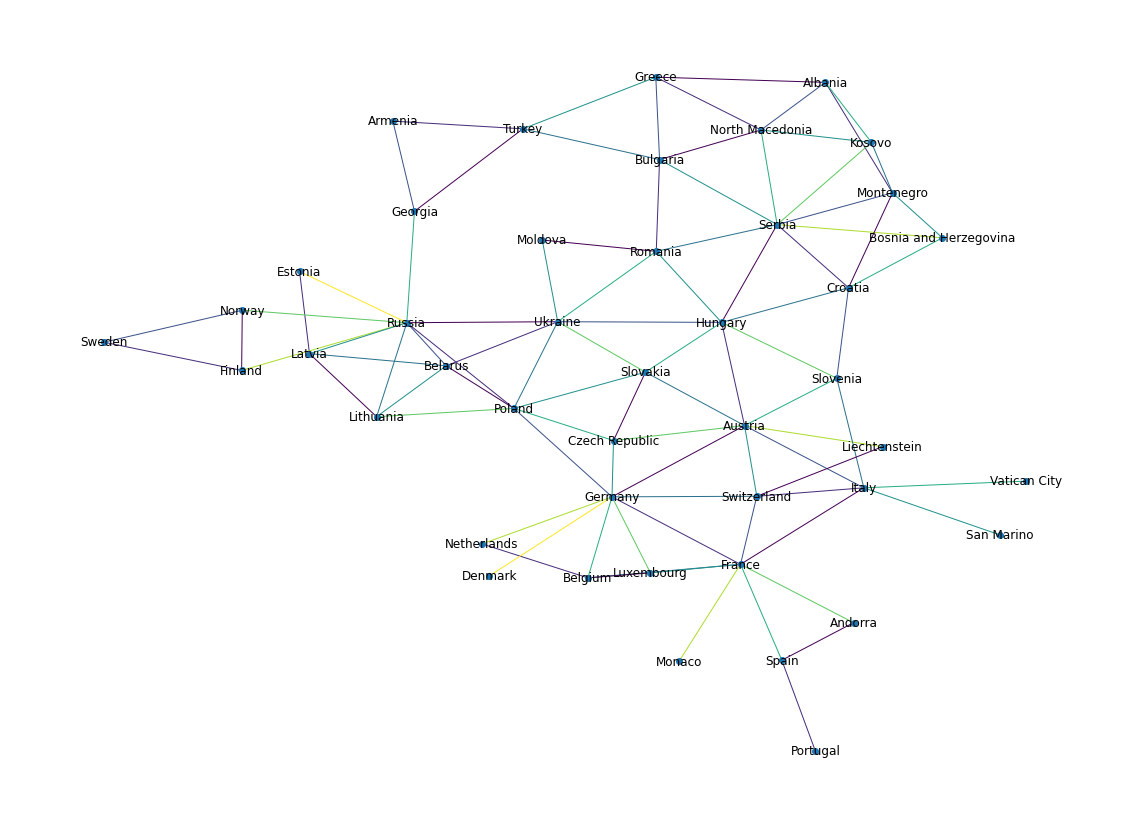

In [16]:
G_line = nx.line_graph(G_nx)
min_edge_coloring = nx.greedy_color(G_line)
map_color = []
for edge in G_nx.edges:
    map_color.append(min_edge_coloring[edge])
fig, ax = plt.subplots(figsize=(20, 15))
pos_color = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_color, edge_color=map_color, node_size=None, with_labels=True)

(e) Using clique form networkx to find all cliques, searching for the maximum

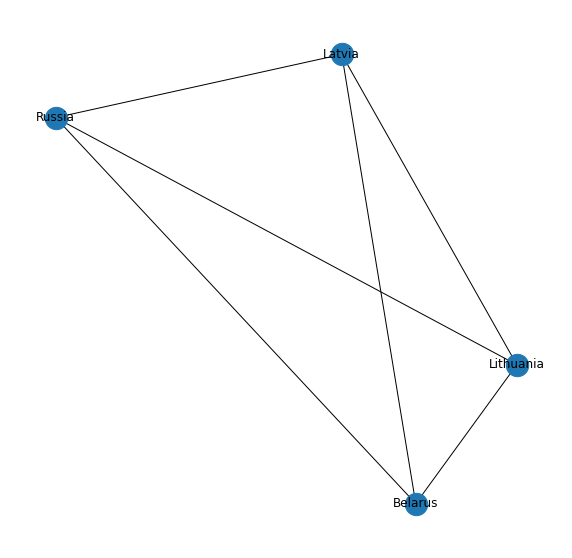

In [17]:
from networkx import clique
cliques = clique.find_cliques_recursive(G_nx)
clique_mx = []
for clique in cliques:
    if (len(clique) > len(clique_mx)):
        clique_mx = clique
clique_graph = G_nx.subgraph(clique_mx)
fig, ax = plt.subplots(figsize=(10, 10))
pos_clique = nx.spring_layout(G_nx)
nx.draw(clique_graph, pos_clique, node_size=500, with_labels=True)

(f) Finding the maximum stable set, using loop to find maximum from result of maximal_imdependent_set

Number of vertices in the set - 19


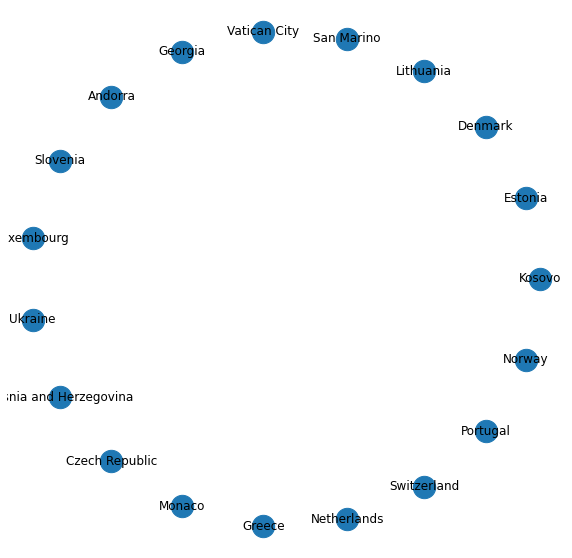

In [18]:
mx_set = []
for i in range(0, 1000):
    set = nx.maximal_independent_set(G_nx)
    if(len(set) > len(mx_set)):
        mx_set = set
print('Number of vertices in the set -',len(mx_set))
independent_set_graph = G_nx.subgraph(mx_set)
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_circular(independent_set_graph, node_size=500, with_labels=True)

(g) Finding the maximum matching. Yellow edges are part of the matching

Number of edges - 15


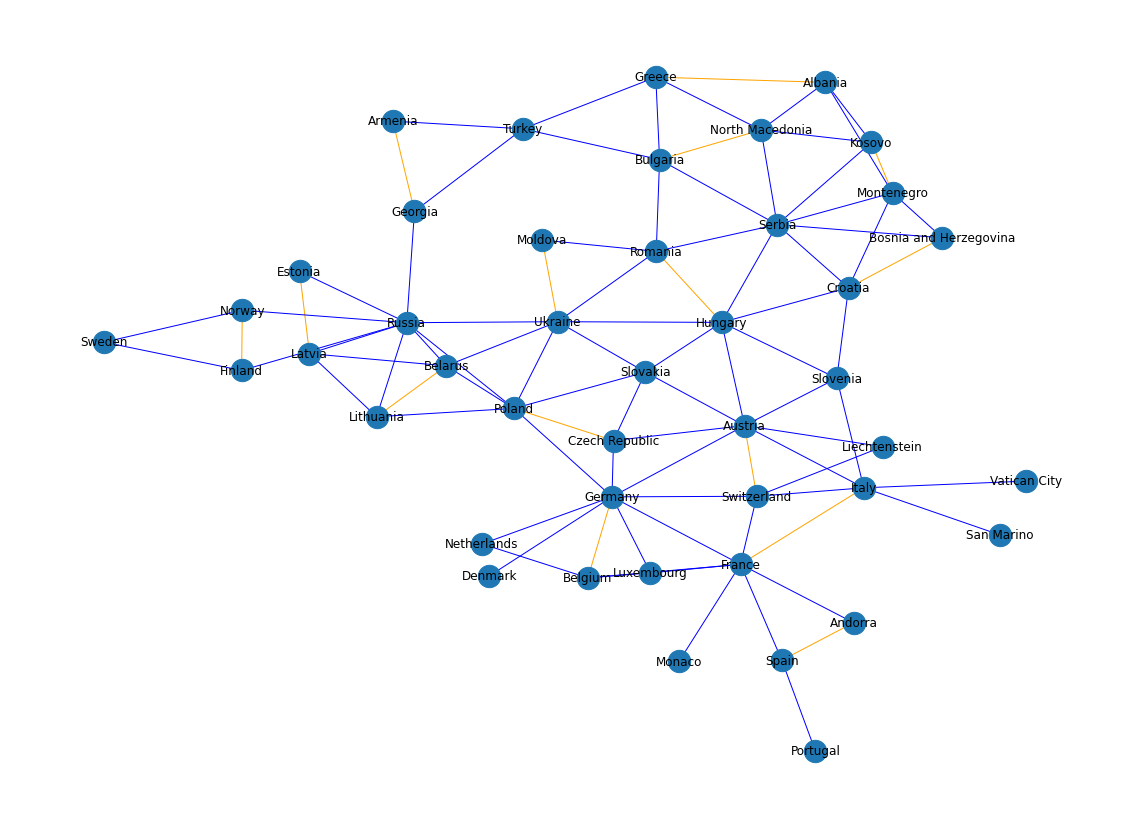

In [20]:
match_max = []
for i in range(0, 1000):
    match = nx.maximal_matching(G_nx)
    if(len(match)>15):
        print("yeah")
    if(len(match) > len(match_max)):
        match_max = match
print('Number of edges -', len(match_max))
map_color = []
for country1, country2 in G_nx.edges:
    k1 = (country1, country2)
    k2 = (country2, country1)
    if(k1 in match_max or k2 in match_max):
        map_color.append('orange')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_match = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_match, edge_color=map_color, node_size=500, with_labels=True)

(h) Finding the minimum vertex cover usign vertex_cover from netwrokx, red nodes are part of the cover

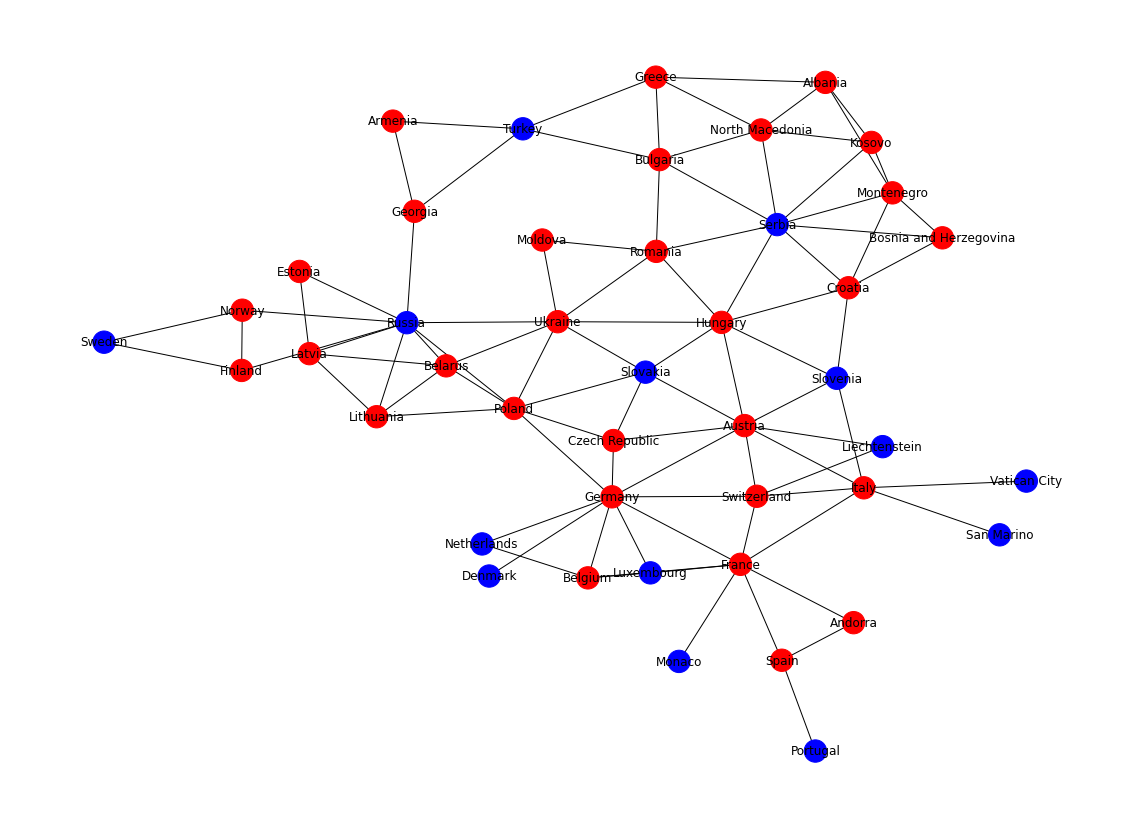

In [21]:
from networkx.algorithms.approximation import vertex_cover
min_vertex_cover = vertex_cover.min_weighted_vertex_cover(G_nx)
map_color = []
for node in G_nx.nodes:
    if (node in min_vertex_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_edge_cover = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_edge_cover, node_color=map_color, node_size=500, with_labels=True)

(i) Finding the minimum edge cover by extending the maximum matching

These nodes are not a part of the cover:
Denmark
Liechtenstein
Luxembourg
Monaco
Netherlands
Portugal
Russia
San Marino
Serbia
Slovakia
Slovenia
Sweden
Turkey
Vatican City
They should be added!
Is it the edge cover now:? True , Number of edges: 29
There is no better way to add nodes. So, it is the minimum edge cover


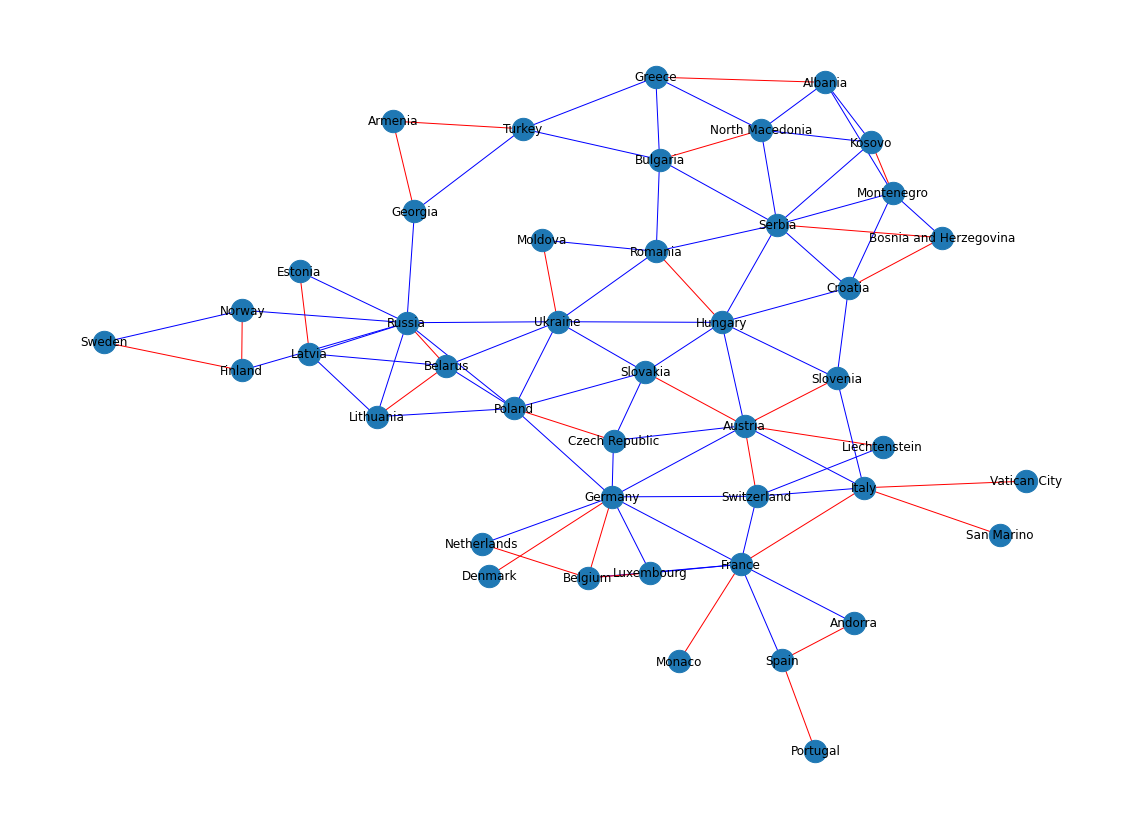

In [22]:
min_edge_cover = match_max
print('These nodes are not a part of the cover:')
map_color = []
for edge in G_nx.edges:
    if (edge in min_edge_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
nodes_to_add = []
for node in G_nx.nodes:
    check = False
    for v, u in min_edge_cover:
        if (node == v or node == u):
            check = True
    if (not check):
        nodes_to_add.append(node)
        print(node)
print('They should be added!')
for node in nodes_to_add:
    for edge in G_nx.edges:
        if (not(edge in min_edge_cover) and node in edge):
            min_edge_cover.update([edge])
            break
print('Is it the edge cover now:?', nx.is_edge_cover(G_nx, min_edge_cover), ', Number of edges:', len(min_edge_cover))
print('There is no better way to add nodes. So, it is the minimum edge cover')
map_color = []
for edge in G_nx.edges:
    if (edge in min_edge_cover):
        map_color.append('red')
    else:
        map_color.append('blue')
fig, ax = plt.subplots(figsize=(20, 15))
pos_edge_cover = nx.kamada_kawai_layout(G_nx)
nx.draw(G_nx, pos_edge_cover, edge_color=map_color, node_size=500, with_labels=True)

(j) Finding closed path using networkx

In [23]:
closed_path = nx.approximation.traveling_salesman_problem(G_nx)
print('Number of nodes in the path:', len(closed_path))
print(closed_path)

Number of nodes in the path: 60
['Armenia', 'Turkey', 'Bulgaria', 'Romania', 'Moldova', 'Ukraine', 'Belarus', 'Lithuania', 'Russia', 'Finland', 'Sweden', 'Norway', 'Russia', 'Estonia', 'Latvia', 'Belarus', 'Poland', 'Czech Republic', 'Austria', 'Slovenia', 'Austria', 'Slovakia', 'Austria', 'Switzerland', 'Liechtenstein', 'Austria', 'Italy', 'Vatican City', 'Italy', 'San Marino', 'Italy', 'France', 'Spain', 'Portugal', 'Spain', 'Andorra', 'France', 'Monaco', 'France', 'Belgium', 'Netherlands', 'Germany', 'Denmark', 'Germany', 'Luxembourg', 'Germany', 'Austria', 'Hungary', 'Croatia', 'Bosnia and Herzegovina', 'Serbia', 'Montenegro', 'Albania', 'North Macedonia', 'Kosovo', 'Albania', 'Greece', 'Turkey', 'Georgia', 'Armenia']


(k) Finding closed path in the line graph using networkx

In [86]:
G_line = nx.line_graph(G_nx)
closed_path = nx.approximation.traveling_salesman_problem(G_line)
print('Number of edges in the path:', len(closed_path))
print(closed_path)

Number of edges in the path: 107
[('Denmark', 'Germany'), ('Germany', 'Poland'), ('Belarus', 'Poland'), ('Lithuania', 'Poland'), ('Belarus', 'Poland'), ('Belarus', 'Latvia'), ('Latvia', 'Lithuania'), ('Belarus', 'Lithuania'), ('Belarus', 'Poland'), ('Czech Republic', 'Poland'), ('Czech Republic', 'Slovakia'), ('Austria', 'Slovakia'), ('Slovakia', 'Ukraine'), ('Belarus', 'Ukraine'), ('Belarus', 'Poland'), ('Poland', 'Russia'), ('Lithuania', 'Russia'), ('Estonia', 'Russia'), ('Estonia', 'Latvia'), ('Latvia', 'Russia'), ('Finland', 'Russia'), ('Finland', 'Norway'), ('Norway', 'Sweden'), ('Finland', 'Sweden'), ('Finland', 'Norway'), ('Norway', 'Russia'), ('Latvia', 'Russia'), ('Russia', 'Ukraine'), ('Poland', 'Ukraine'), ('Moldova', 'Ukraine'), ('Hungary', 'Ukraine'), ('Austria', 'Hungary'), ('Austria', 'Liechtenstein'), ('Austria', 'Czech Republic'), ('Austria', 'Hungary'), ('Hungary', 'Romania'), ('Romania', 'Ukraine'), ('Belarus', 'Ukraine'), ('Belarus', 'Russia'), ('Georgia', 'Russia')

(l) Using networkx to find all blocks, then creating a block-cut tree graph, nodes are connected if blocks have same vertex cut

Blocks:
{'Spain', 'Portugal'} - 0 is name of the node in block_cut graph
{'France', 'Spain', 'Andorra'} - 1 is name of the node in block_cut graph
{'Germany', 'Denmark'} - 2 is name of the node in block_cut graph
{'Italy', 'San Marino'} - 3 is name of the node in block_cut graph
{'Italy', 'Vatican City'} - 4 is name of the node in block_cut graph
{'France', 'Monaco'} - 5 is name of the node in block_cut graph
{'Sweden', 'Russia', 'Finland', 'Norway'} - 6 is name of the node in block_cut graph
{'Belarus', 'Kosovo', 'Russia', 'Estonia', 'Lithuania', 'Turkey', 'Liechtenstein', 'Moldova', 'Georgia', 'Serbia', 'Albania', 'Romania', 'Armenia', 'Poland', 'Slovenia', 'Luxembourg', 'Ukraine', 'Montenegro', 'North Macedonia', 'Bosnia and Herzegovina', 'Czech Republic', 'Hungary', 'Bulgaria', 'Italy', 'Germany', 'Austria', 'Latvia', 'Croatia', 'France', 'Greece', 'Netherlands', 'Switzerland', 'Slovakia', 'Belgium'} - 7 is name of the node in block_cut graph
{'United Kingdom', 'Ireland'} - 8 is na

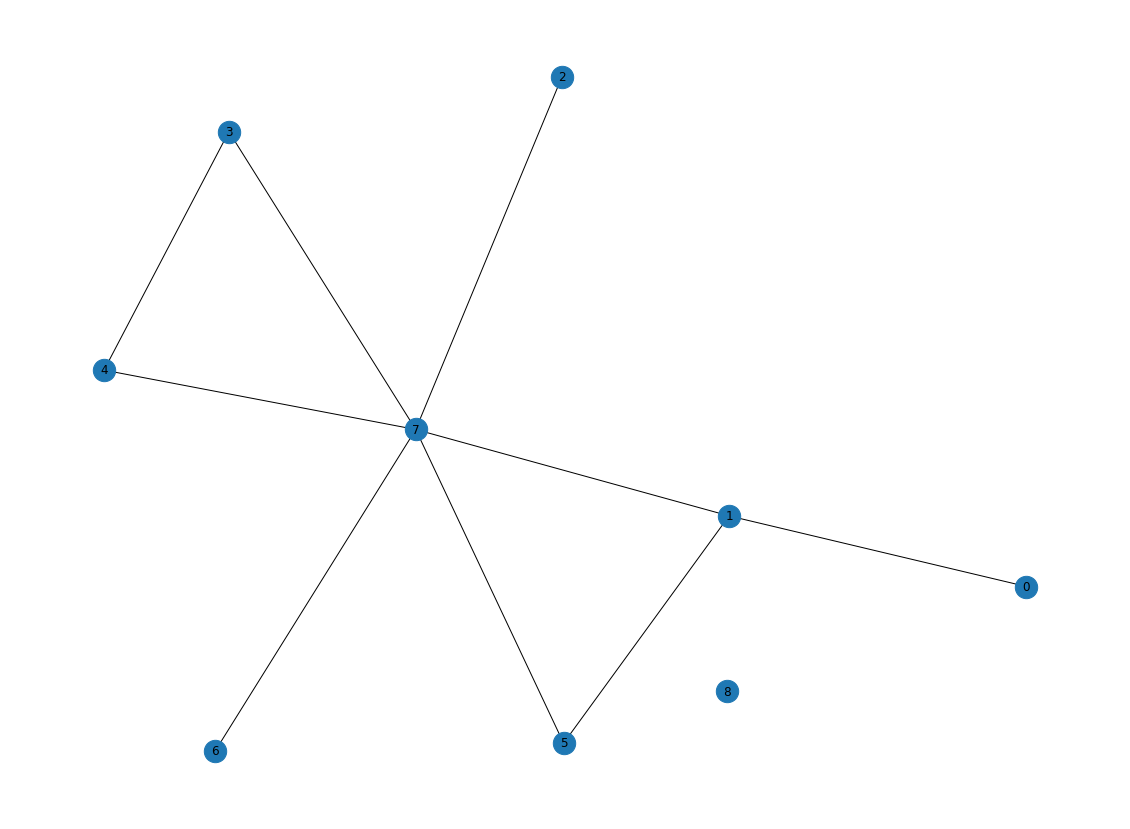

In [31]:
bicomp = list(nx.biconnected_components(g_nx))
g_comp_cut = nx.Graph(g_nx)
k = 0
save = []
print('Blocks:')
for q in bicomp:
    print(q, '-', k,'is name of the node in block_cut graph')
    k = k + 1
g_block_cut = nx.Graph()
for i in range(0, 9):
    g_block_cut.add_node(i)
k = 0
for i in bicomp:
    k_ = 0
    for j in bicomp:
        if(i != j):
            for node in i:
                if(node in j):
                    g_block_cut.add_edge(k, k_)
        k_ = k_ + 1
    k = k + 1
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.kamada_kawai_layout(g_block_cut)
nx.draw(g_block_cut, pos, node_size=500, with_labels=True)

(m) Finding all 2-edge-connected components using networkx, visualize components using color

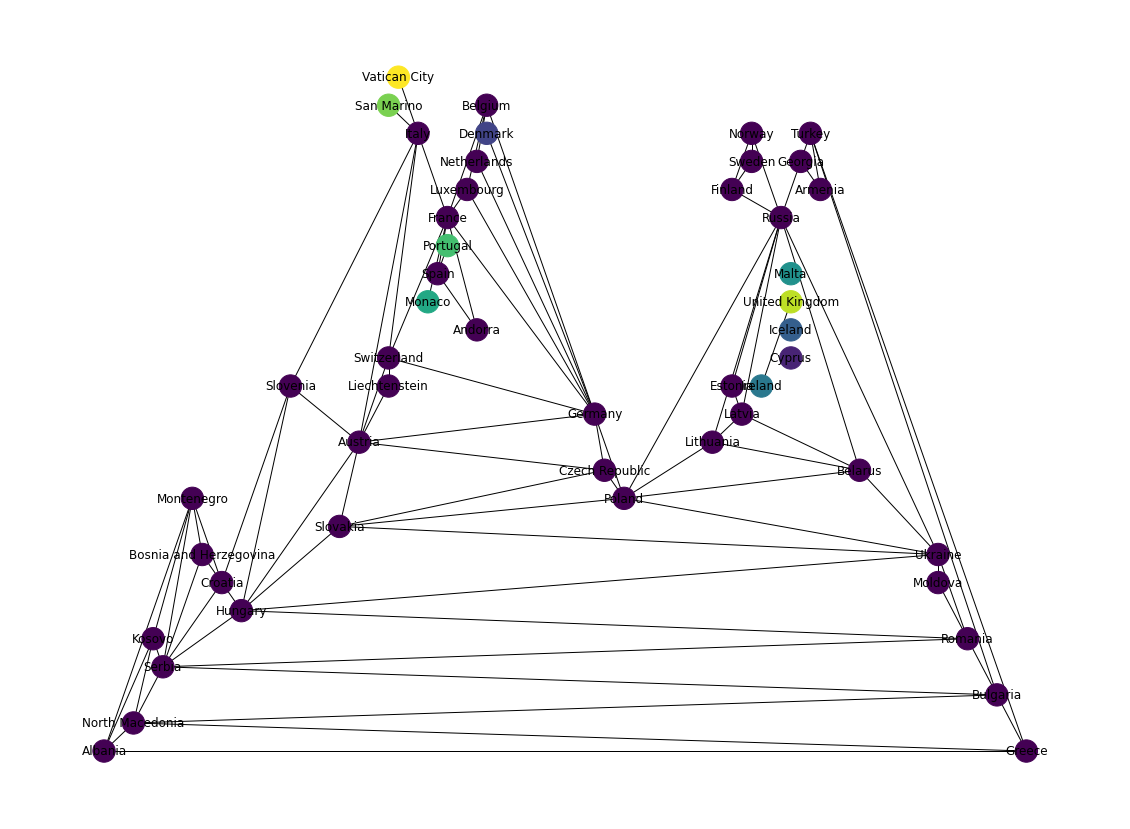

In [45]:
edge_connected = list(nx.k_edge_components(g_nx, 2))
map_color = []
for node in g_nx.nodes:
    for i in range(len(edge_connected)):
        if (node in edge_connected[i]):
            map_color.append(i)
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_planar(g_nx, node_color=map_color, node_size=500, with_labels=True)
    

(n) Using sagecell.sagemath.org with special functions for constructing SPQR tree.

Code which was used in Sage


import networkx as nx
g = nx.Graph()
nodes = ['Belarus', 'Kosovo', 'Russia', 'Estonia', 'Lithuania', 'Turkey', 'Liechtenstein', 'Moldova', 'Georgia', 'Serbia', 'Albania', 'Romania', 'Armenia', 'Poland', 'Slovenia', 'Luxembourg', 'Ukraine', 'Montenegro', 'North Macedonia', 'Bosnia and Herzegovina', 'Czech Republic', 'Hungary', 'Bulgaria', 'Italy', 'Germany', 'Austria', 'Latvia', 'Croatia', 'France', 'Greece', 'Netherlands', 'Switzerland', 'Slovakia', 'Belgium']
for k in nodes:
    g.add_node(k)
print(g)
edges = [('Armenia', 'Georgia'),
('Armenia', 'Turkey'),
('Albania', 'Greece'),
('Albania', 'Montenegro'),
('Albania', 'North Macedonia'),
('Albania', 'Kosovo'),
('Austria', 'Switzerland'),
('Austria', 'Germany'),
('Austria', 'Hungary'),
('Austria', 'Italy'),
('Austria', 'Liechtenstein'),
('Austria', 'Slovenia'),
('Austria', 'Slovakia'),
('Austria', 'Czech Republic'),
('Belarus', 'Lithuania'),
('Belarus', 'Latvia'),
('Belarus', 'Poland'),
('Belarus', 'Russia'),
('Belarus', 'Ukraine'),
('Belgium', 'Germany'),
('Belgium', 'France'),
('Belgium', 'Luxembourg'),
('Belgium', 'Netherlands'),
('Bosnia and Herzegovina', 'Croatia'),
('Bosnia and Herzegovina', 'Montenegro'),
('Bosnia and Herzegovina', 'Serbia'),
('Bulgaria', 'Greece'),
('Bulgaria', 'North Macedonia'),
('Bulgaria', 'Romania'),
('Bulgaria', 'Serbia'),
('Bulgaria', 'Turkey'),
('Croatia', 'Hungary'),
('Croatia', 'Montenegro'),
('Croatia', 'Serbia'),
('Croatia', 'Slovenia'),
('Czech Republic', 'Germany'),
('Czech Republic', 'Poland'),
('Czech Republic', 'Slovakia'),
('Estonia', 'Latvia'),
('Estonia', 'Russia'),
('France', 'Switzerland'),
('France', 'Germany'),
('France', 'Italy'),
('France', 'Luxembourg'),
('Germany', 'Switzerland'),
('Germany', 'Luxembourg'),
('Germany', 'Netherlands'),
('Germany', 'Poland'),
('Georgia', 'Russia'),
('Georgia', 'Turkey'),
('Greece', 'North Macedonia'),
('Greece', 'Turkey'),
('Hungary', 'Romania'),
('Hungary', 'Serbia'),
('Hungary', 'Slovenia'),
('Hungary', 'Slovakia'),
('Hungary', 'Ukraine'),
('Italy', 'Switzerland'),
('Italy', 'Slovenia'),
('Kosovo', 'Montenegro'),
('Kosovo', 'North Macedonia'),
('Kosovo', 'Serbia'),
('Latvia', 'Lithuania'),
('Latvia', 'Russia'),
('Liechtenstein', 'Switzerland'),
('Lithuania', 'Poland'),
('Lithuania', 'Russia'),
('Moldova', 'Romania'),
('Moldova', 'Ukraine'),
('Montenegro', 'Serbia'),
('North Macedonia', 'Serbia'),
('Poland', 'Russia'),
('Poland', 'Slovakia'),
('Poland', 'Ukraine'),
('Romania', 'Serbia'),
('Romania', 'Ukraine'),
('Russia', 'Ukraine'),
('Slovakia', 'Ukraine'),]
for k in edges:
    v, u = k;
    g.add_edge(v, u)
print(g)
graph = Graph(g)
graph = graph.to_undirected()
tree = graph.spqr_tree()
plot(tree)

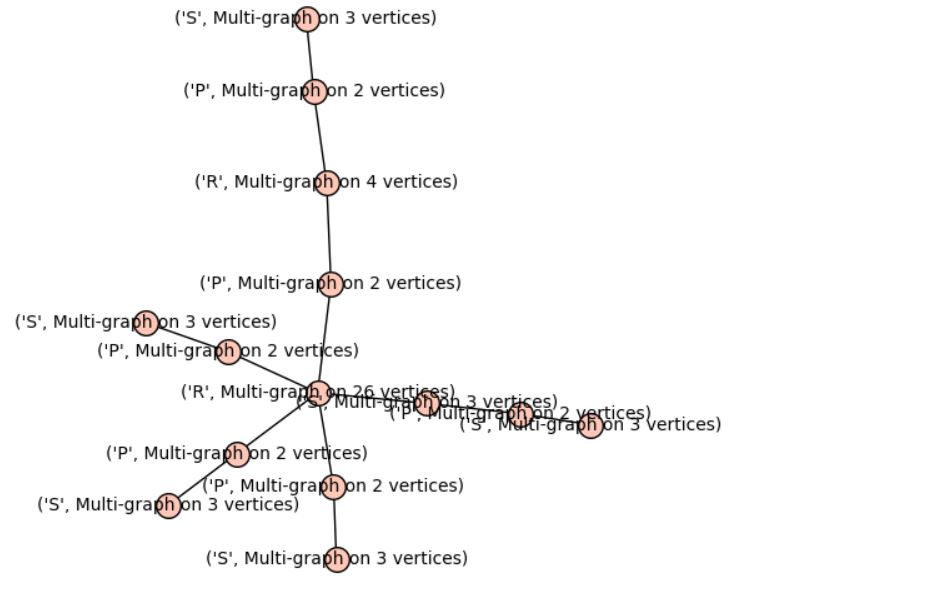

In [193]:
import re
from IPython.display import Image
Image(filename='spqr.JPG')

Importing a package to find distance between capitals

In [34]:
import geopy
from geopy.geocoders import Nominatim
import geopy.distance as gd

(o) Using coordinates of capitals to find a distance between them. Package geopy helps to find coordinates and a distance

In [53]:
g_w = nx.Graph()
g_w.add_nodes_from(list(g_nx.nodes()))
for edge in g_nx.edges:
    data1 = CountryInfo(edge[0])
    data2 = CountryInfo(edge[1])
    cap1 = data1.capital()
    cap2 = data2.capital()
    geolocator1 = Nominatim(user_agent='user')
    geolocator2 = Nominatim(user_agent='user')
    location1 = geolocator1.geocode(cap1)
    location2 = geolocator2.geocode(cap2)
    distance = int(gd.great_circle((location1.latitude, location1.longitude), (location2.latitude, location2.longitude)).km)
    g_w.add_edge(edge[0], edge[1], weight=distance)    

Finding the minimum spannig tree for the largest connected component

Total weight - 21284


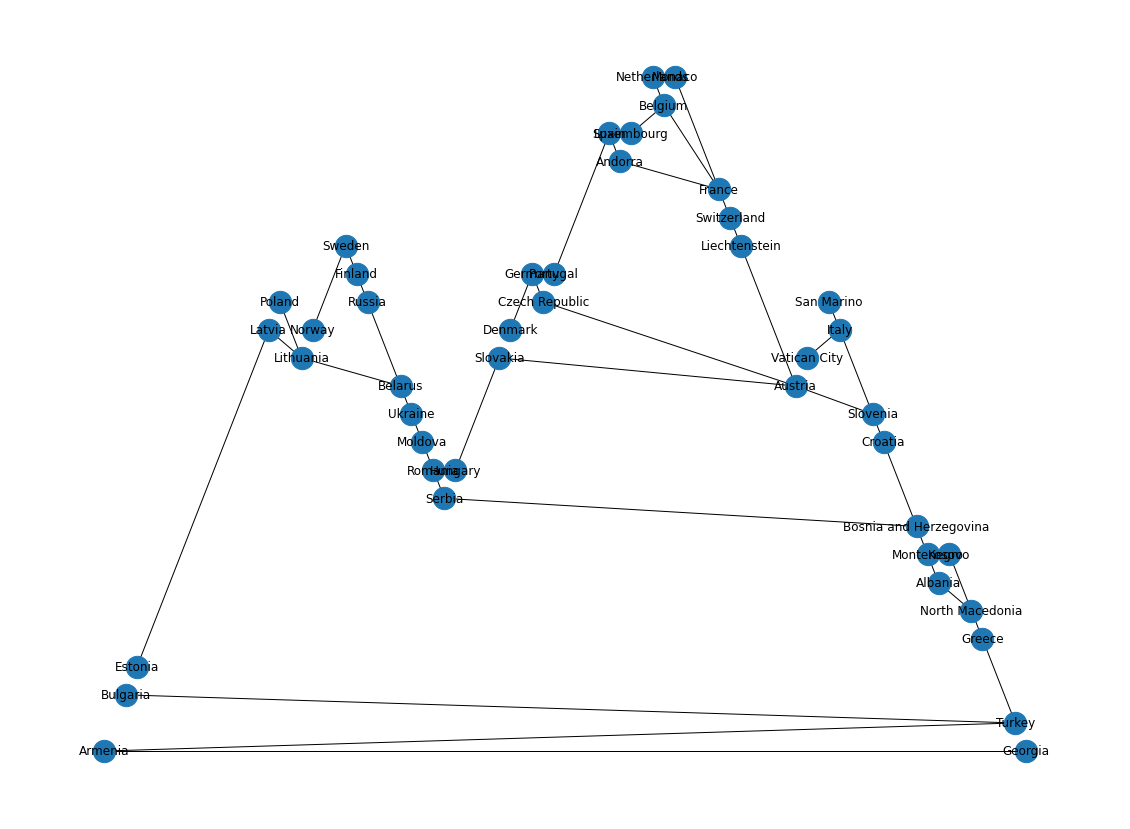

In [174]:
G_w = g_w.subgraph(max(nx.connected_components(g_w)))
T = nx.minimum_spanning_tree(G_w)
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw_planar(T, node_size=500, with_labels=True)
total_weight = 0
for (v, u, w) in T.edges(data=True):
    total_weight = total_weight + w['weight']
print('Total weight -', total_weight)

Creating fuctions to define w for a node.

In [157]:

def dfs(start, node, visited, size, weight):
    size = size + 1
    visited.append(node)
    for to in T.nodes:
        if(T.has_edge(node, to) and to not in visited and to != start):
            #print((node, to))
            weight = weight + T[node][to]["weight"]
            size, weight = dfs(start, to, visited, size, weight)
    return size, weight
def w(node):
    max_size = 0
    max_weight = 0
    for to in T.nodes:
        if(T.has_edge(node, to)):
            size, weight = dfs(node, to, [], 0, T[node][to]["weight"])
            if(size > max_size):
                max_size = size
                max_weight = weight
            #print("end of iteration")
           # print(max_size, max_weight)
    return max_weight

(p) Searching for a centroid using functions above

In [160]:
node_w = []
for node in T.nodes:
    node_w.append((w(node), node))
print('Centroid -', min(node_w))

Centroid - (6626, 'Bosnia and Herzegovina')


(q) Consturcting the Prufer code for T

In [173]:
map_num = {}
k = 0
for node in T.nodes:
    map_num[node] = k
    k = k + 1
T_prufer =  nx.relabel_nodes(T, map_num)
print('Prufer sequence -', nx.to_prufer_sequence(T_prufer))

Prufer sequence - [41, 14, 20, 9, 3, 0, 41, 36, 28, 22, 5, 13, 5, 13, 39, 22, 4, 38, 18, 3, 2, 13, 40, 12, 33, 4, 42, 21, 3, 37, 16, 28, 1, 26, 6, 24, 32, 35, 6, 8, 37, 18]
